# 3 Виконання

## 3.1 

### Для початку імпортуємо модулі pandas, numpy, seaborn, matplotlib. Завантажимо датафрейм.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
df = pd.read_csv('data/Crime.csv')
df.head()

,CrimeRate,Youth,Southern,Education,ExpenditureYear0,LabourForce,Males,MoreMales,StateSize,YouthUnemployment,...,ExpenditureYear10,LabourForce10,Males10,MoreMales10,StateSize10,YouthUnemploy10,MatureUnemploy10,HighYouthUnemploy10,Wage10,BelowWage10
0,45.5,135,0,12.4,69,540,965,0,6,80,...,71,564,974,0,6,82,20,1,632,142
1,52.3,140,0,10.9,55,535,1045,1,6,135,...,54,540,1039,1,7,138,39,1,521,210
2,56.6,157,1,11.2,47,512,962,0,22,97,...,44,529,959,0,24,98,33,0,359,256
3,60.3,139,1,11.9,46,480,968,0,19,135,...,41,497,983,0,20,131,50,0,510,235
4,64.2,126,0,12.2,106,599,989,0,40,78,...,97,602,989,0,42,79,24,1,660,162


*Завантаження датафрейму*

### Переставимо колонку у "Southern" на перше місце, оскільки розташування штату не змінювався.

In [2]:
southern_name = 'Southern'
southern = df.pop(southern_name)
df.insert(0, southern_name, southern)
df.head()

,Southern,CrimeRate,Youth,Education,ExpenditureYear0,LabourForce,Males,MoreMales,StateSize,YouthUnemployment,...,ExpenditureYear10,LabourForce10,Males10,MoreMales10,StateSize10,YouthUnemploy10,MatureUnemploy10,HighYouthUnemploy10,Wage10,BelowWage10
0,0,45.5,135,12.4,69,540,965,0,6,80,...,71,564,974,0,6,82,20,1,632,142
1,0,52.3,140,10.9,55,535,1045,1,6,135,...,54,540,1039,1,7,138,39,1,521,210
2,1,56.6,157,11.2,47,512,962,0,22,97,...,44,529,959,0,24,98,33,0,359,256
3,1,60.3,139,11.9,46,480,968,0,19,135,...,41,497,983,0,20,131,50,0,510,235
4,0,64.2,126,12.2,106,599,989,0,40,78,...,97,602,989,0,42,79,24,1,660,162


*Переставлення колонки*

### Переставимо показники через 10 років у звичайні колонки, розділивши датафрейм надвоє та з'єднавши частини вертикально. Таким чином ми збільшуємо розмір вибірки у два рази, тому модель матиме більше даних, аніж у тому випадку якби ми знаходили, наприклад, середнє арифметичне між колонками за 10 років.

In [3]:
df10 = df.loc[:, 'CrimeRate10':]
df.drop(df.columns[14:], axis=1, inplace=True)
df10.insert(0, southern_name, southern)
df10.columns = df.columns
df = pd.concat([df, df10], axis=0, ignore_index=True)
df.rename(columns={'ExpenditureYear0': 'ExpenditureYear'}, inplace=True)
rate = 'CrimeRate'
rate_s = df.pop(rate)
df.insert(0, rate, rate_s)

*Перетворення датафрейму*

### Побудуємо матрицю кореляцій.

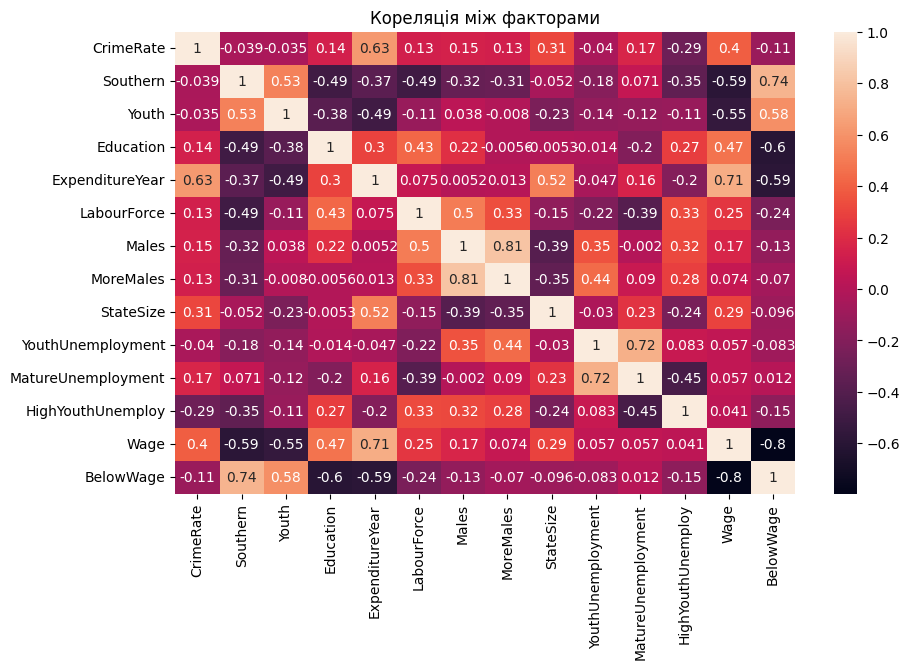

In [4]:
def corr_map(df, figsize):
    fig, axis = plt.subplots(figsize=figsize)
    axis.set_title('Кореляція між факторами')
    sns.heatmap(df.corr(), ax=axis, annot=True)
corr_map(df, (10, 6))

*Матриця кореляцій*